# Logistic Regression Project 2 - Solutions

# Description
The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id
SepalLengthCm
SepalWidthCm
PetalLengthCm
PetalWidthCm
Species

# Import a few libraries you think you'll need (Or just import them as you go along!)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
iris = pd.read_csv('iris species.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# image of iris......
Iris Virginica
Iris Versicolor
We will build a classification model which can classify these three species based on the length and width measurements of their sepals and petals.

** Use info and describe() on iris data**

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# to display stats about data
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# delete a column id
iris=iris.drop(columns=['Id'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Exploratory Data Analysis
Let's use seaborn to explore the data!
Try recreating the plots shown below!
** Create a histogram of the SepalLengthCm**

Text(0.5, 0, 'SepalLengthCm')

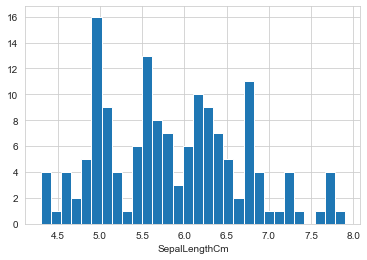

In [7]:
sns.set_style('whitegrid')
iris['SepalLengthCm'].hist(bins=30)
plt.xlabel('SepalLengthCm')

Create a jointplot showing Area Income versus Age.

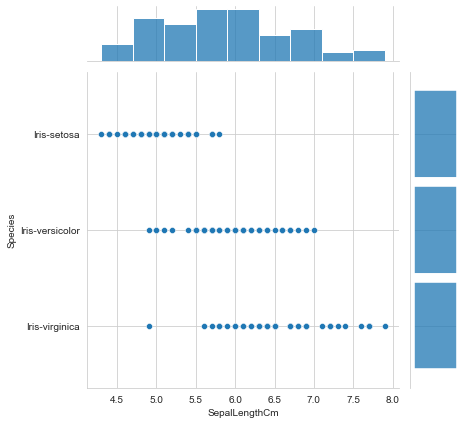

In [8]:
sns.jointplot(x='SepalLengthCm',y='Species',data=iris)

Create a jointplot showing the kde distributions of PetalLengthCm on site vs PetalWidthCm

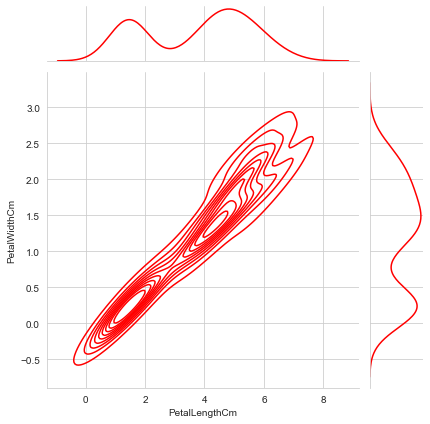

In [9]:
sns.jointplot(x='PetalLengthCm',y='PetalWidthCm',data=iris,color='red',kind='kde');

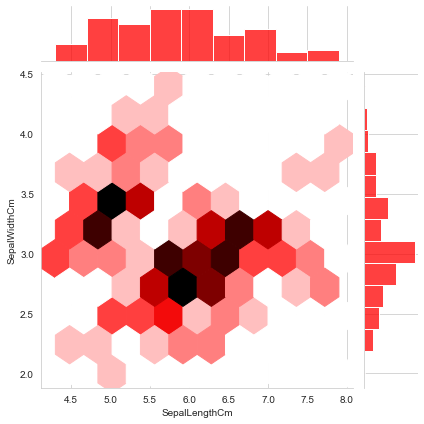

In [10]:
sns.jointplot(x='SepalLengthCm',y='SepalWidthCm',data=iris,color='red',kind='hex');

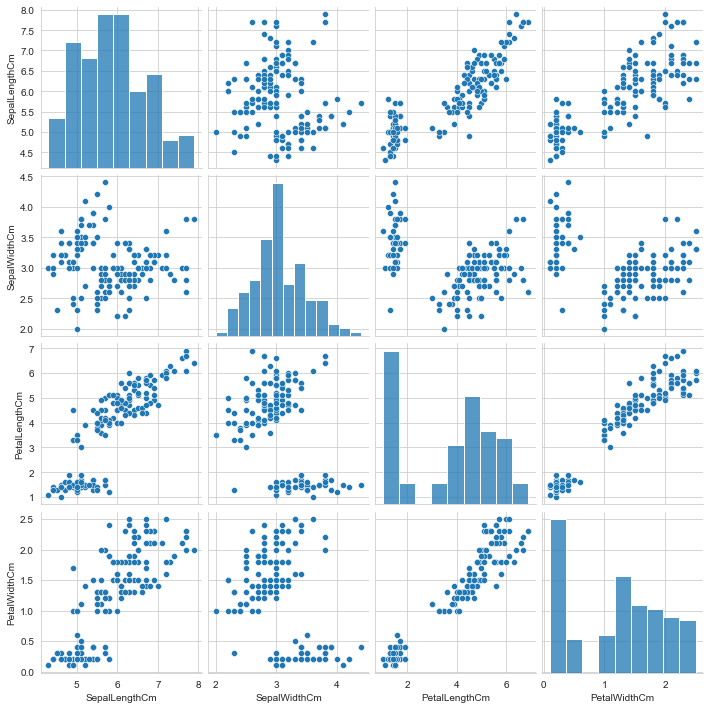

In [11]:
sns.pairplot(iris)

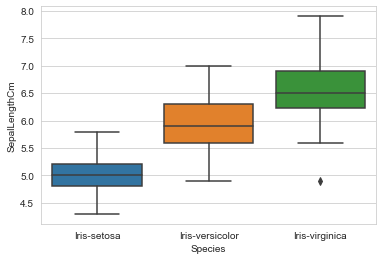

In [12]:
sns.boxplot(x='Species',y='SepalLengthCm',data=iris);

In [13]:
iris.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


From here we can conclude , the correlation between sepalLength,sepalWidth and petalLength, petalWidth is quite hight, its around 0.87 and 0.82.

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# encoding species variable to numeric variable.

In [15]:
iris['Species'] = le.fit_transform(iris['Species'])
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [16]:
iris.tail()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


# Logistic Regression
Now it's time to do a train test split, and train our model!
You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [17]:
from sklearn.model_selection import train_test_split

In [20]:
X = iris[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm','PetalWidthCm']]
y = iris['Species']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [22]:
from sklearn.linear_model import LogisticRegression

In [23]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression()

In [24]:
predictions = logmodel.predict(X_test)

In [25]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(y_test,predictions)
print(cmat)

[[19  0  0]
 [ 0 15  0]
 [ 0  0 16]]


In [26]:
from sklearn.metrics import classification_report

In [27]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



# Project 2 Done

In [51]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
model3 = DecisionTreeClassifier()
model3.fit(X_train, y_train)
# print metric to get performance
print("Accuracy: ",model3.score(X_test, y_test))

Accuracy:  0.98


In [57]:
iris.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64